# Project - Support Vector Machine (SVM)
## Phi Le
### DATA - 4319


Support Vector Machine or SVM comes under the category of supervised Machine Learning algorithms and finds an application in both classification and regression problems. It is most commonly used for classification of problems and classifies the data points by using a $\textbf{hyperplane}$.

The first step of this Data Science algorithm involves plotting all the data items as individual points in an n-dimensional graph.

Here, n is the number of features and the value of each individual feature is the value of a specific coordinate. Then we find the hyperplane that best $\textbf{separates}$ the two classes for classifying them.

Finding the correct hyperplane plays the most important role in classification. The data points which are closest to the separating hyperplane are the support vectors.

![](https://i1.wp.com/techvidvan.com/tutorials/wp-content/uploads/sites/2/2020/03/SVm-support-vectors.jpg?ssl=1)

Let us consider the following example to understand how you can identify the right hyperplane.

The basic principle for selecting the best hyperplane is that you have to choose the hyperplane that separates the two classes very well.

![](https://i2.wp.com/techvidvan.com/tutorials/wp-content/uploads/sites/2/2020/03/SVM-hyperlanes.jpg?ssl=1)

In this case, the hyperplane B is classifying the data points very well. Thus, B will be the right hyperplane.

![](https://i1.wp.com/techvidvan.com/tutorials/wp-content/uploads/sites/2/2020/03/hyperlane-classifying-data-points.jpg?ssl=1)

All three hyperplanes are separating the two classes properly. In such cases, we have to select the hyperplane with the $\textbf{maximum margin}$.

As we can see in the above image, hyperplane B has the maximum margin therefore it will be the right hyperplane.

![](https://i2.wp.com/techvidvan.com/tutorials/wp-content/uploads/sites/2/2020/03/hyperlane-with-maximum-margin.jpg?ssl=1)

In this case, the hyperplane B has the maximum margin but it is not classifying the two classes accurately. Thus, A will be the right hyperplane.

#### Information about the dataset

The dataset can be downloaded from here (https://www.dropbox.com/s/sj2r3og9br7z08j/Social_Network_Ads.csv?dl=0). This dataset contains the buying decision of a customer based on gender, age and salary. Now, using SVM, we need to classify this dataset to predict the decision for unknown data points.

$\textbf{Step 1: Import packages and dataset}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

$\textbf{Step 2: Identify features and label}$

In the dataset, the Age and EstimatedSalary columns are independent and the Purchased column is dependent. So we will take both the Age and EstimatedSalary in our feature matrix and the Purchased column in the dependent variable vector.

In [3]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

$\textbf{Step 3: Pre-processing the data}$

In [4]:
#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Scale the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

$\textbf{Step 4: Training the Dataset}$

In [5]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

$\textbf{Step 5: Getting the result from Trained Data set}$

In [6]:
#Pedict the data
y_pred = classifier.predict(X_test)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred) 
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


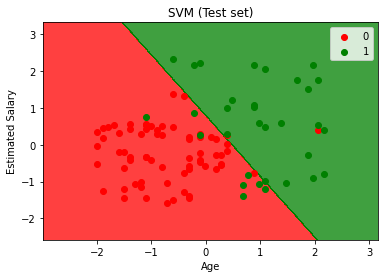

In [7]:
#Visualizing Support Vector Machine in Python
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()